In [1]:
import ROOT

Welcome to JupyROOT 6.16/00


In [2]:
file = ROOT.TFile.Open("../output/Charmonium2018B_test/dzero_m21_charmonium_2018B.root")

mass = ROOT.RooRealVar("mass", "", 1.75, 1.96)
data = ROOT.RooDataSet("data", "", file.Dzero, ROOT.RooArgSet(mass))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision


In [3]:
1.86430e+00   2.18345e-04   5.04268e-05   1.43975e-01
   2  p0           1.07258e+02   5.72298e+00   2.80419e-04  -2.77715e-01
   3  p1          -4.74824e+01   2.53034e+00   2.75117e-04   2.61393e+00
   4  sigma        1.20018e-02   2.31753e-04   1.20548e-05  -1.35114e+00
   5  yield background   1.12400e+05   4.04972e+02   3.71054e-05   5.22058e-01
   6  yield signal   1.41822e+04   2.57161e+02   3.87373e-05  -7.98566e-01

In [9]:
## Signal definition: Gaussian 

yield_signal = ROOT.RooRealVar("yield signal", "", 1e4, 0, 1e5)
mean = ROOT.RooRealVar("mean", "", 1.864, 1.830, 1.890)
sigma = ROOT.RooRealVar("sigma", "",  0.011, 0.0, 0.999)

# pdf
gauss = ROOT.RooGaussian("gauss", "", mass, mean, sigma)

In [10]:
## Background definition: Third degree polynomial (p0 x³ + p1 x² + p2 x + 1)

yield_back = ROOT.RooRealVar("yield background", "", 1e5, 0, 1.5e5)
p0 = ROOT.RooRealVar("p0", "", 108.09, 100, 120)
p1 = ROOT.RooRealVar("p1", "", -47.48, -55, -45)
#p2 = ROOT.RooRealVar("p2", "",  -507.63, -550, -450)
#p3 = ROOT.RooRealVar("p3", "", 179.54, 150, 180)

back = ROOT.RooPolynomial("Third degree polynomial", "", mass, ROOT.RooArgList(p0, p1))

#back = ROOT.RooGenericPdf("Third degree polynomial", "", "@1*@0**3 + @2*@0**2 + @3*@0 + @4", ROOT.RooArgList(mass, p0, p1, p2, p3) )
#back = ROOT.RooGenericPdf("Third degree polynomial", "", "@1 * @0**3 + @2 * @0**2, + @3 * @0 + 1", ROOT.RooArgList(mass, p0, p1, p2))

In [11]:
# Model definition and fitting
model = ROOT.RooAddPdf("model", "", ROOT.RooArgList(gauss, back),
                       ROOT.RooArgList(yield_signal, yield_back))



In [12]:
result = model.fitTo(data, ROOT.RooFit.Extended(True), ROOT.RooFit.Range(1.75, 1.96))

[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) constructing test statistic for sub-range named fit
[#1] INFO:Fitting -- RooAbsOptTestStatistic::ctor(nll_model_data) fixing interpretation of coefficients of any RooAddPdf to full domain of observables 
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (gauss,Third degree polynomial)
 **********
 **   11 **SET PRINT           1
 **********
 **********
 **   12 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         1.86400e+00  6.00000e-03    1.83000e+00  1.89000e+00
     2 p0           1.08090e+02  2.00000e+00    1.00000e+02  1.20000e+02
     3 p1          -4.74800e+01  1.00000e+00   -5.50000e+01 -4.50000e+01
     4 sigma        1.10000e-02  5.50000e-03    0.00000e+00  9.99000e-01
     5 yield background   1.00000e+05  1.50000

In [42]:
frame = mass.frame(ROOT.RooFit.Title("Upsilon Invariant mass"))
data.plotOn(frame, ROOT.RooFit.Name("Data"), ROOT.RooFit.DataError(ROOT.RooAbsData.SumW2))
model.plotOn(frame, ROOT.RooFit.Name("Model"), ROOT.RooFit.LineColor(colors[0]))
model.plotOn(frame, ROOT.RooFit.Name("#Upsilon(1S) fit"), ROOT.RooFit.Components("signal1S"), ROOT.RooFit.LineColor(colors[1]))
model.plotOn(frame, ROOT.RooFit.Name("#Upsilon(2S) fit"), ROOT.RooFit.Components("signal2S"), ROOT.RooFit.LineColor(colors[2]))
model.plotOn(frame, ROOT.RooFit.Name("#Upsilon(3S) fit"), ROOT.RooFit.Components("signal3S"), ROOT.RooFit.LineColor(colors[3]))
model.plotOn(frame, ROOT.RooFit.Name("Combinatorial fit"), ROOT.RooFit.Components("background"), ROOT.RooFit.LineColor(colors[4]), ROOT.RooFit.LineStyle(2))

leg = ROOT.TLegend(0.7, 0.7, 0.93, 0.92)
leg.AddEntry(frame.findObject("Data"), "Data", "LEP")
leg.AddEntry(frame.findObject("Model"), "Fit", "L")
leg.AddEntry(frame.findObject("#Upsilon(1S) fit"), "#Upsilon(1S) Fit", "L")
leg.AddEntry(frame.findObject("#Upsilon(2S) fit"), "#Upsilon(2S) Fit", "L")
leg.AddEntry(frame.findObject("#Upsilon(3S) fit"), "#Upsilon(3S) Fit", "L")
leg.AddEntry(frame.findObject("Combinatorial fit"), "Combinatorial Fit", "L")

[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'fit_nll_model_data'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_data'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in range and no explicit plot,norm range was specified, using fit range as default
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) only plotting range 'fit_nll_model_data'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f. curve is normalized using explicit choice of ranges 'fit_nll_model_data'
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) directly selected PDF components: (gauss)
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) indirectly selected PDF components: ()
[#1] INFO:Plotting -- RooAbsPdf::plotOn(model) p.d.f was fitted in range and no explicit plot,norm ra

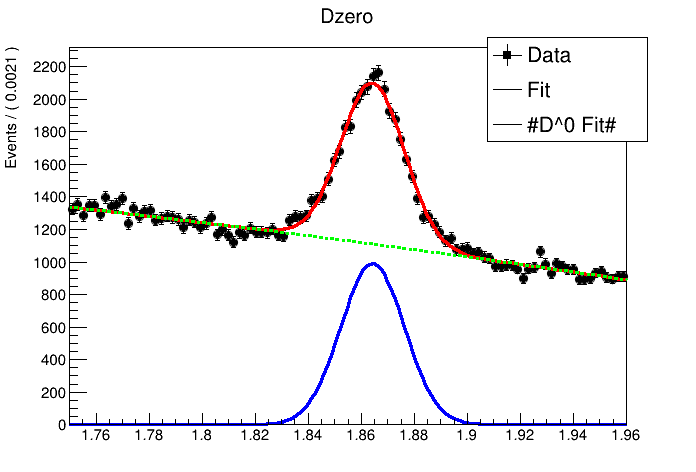

In [42]:
# Colors and styles
colors = {"model" : 2, "signal" : 4, "background" : 3}
styles = {"model" : 1, "signal" : 1, "background" : 2}

# Frame creation
frame = mass.frame(ROOT.RooFit.Title("Dzero"))

## Plots

# Data
data.plotOn(frame)

# Model
model.plotOn(frame, ROOT.RooFit.LineStyle(1), ROOT.RooFit.LineColor(colors["model"]))

# Signal
model.plotOn(frame, ROOT.RooFit.Components("gauss"), ROOT.RooFit.LineStyle(styles["signal"]), ROOT.RooFit.LineColor(colors["signal"]))

# Background
model.plotOn(frame, ROOT.RooFit.Components("Third degree polynomial"), ROOT.RooFit.LineStyle(styles["background"]), ROOT.RooFit.LineColor(colors["background"]))

## Legends

leg = ROOT.TLegend(0.7, 0.7, 0.93, 0.92)
leg.AddEntry(frame.findObject("Data"), "Data", "LEP")
leg.AddEntry(frame.findObject("Model"), "Fit", "L")
leg.AddEntry(frame.findObject("#D0 fit#"), "#D^0 Fit#", "L")


frame.Draw()
leg.Draw("same")

from ROOT import gROOT
gROOT.GetListOfCanvases().Draw()